# Задание к дипломной работе по курсу "Python для анализа данных"
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. 

### Информация по столбцам:

satisfaction_level - Уровень удовлетворенности работой

Last_evaluation - Время с момента последней оценки в годах

number_projects - Количество проектов, выполненных за время работы

average_monthly_hours - Среднее количество часов на рабочем месте в месяц

time_spend_company - Стаж работы в компании в годах

work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником

left - уволился ли сотрудник

promotion_last_5years - повышался ли сотрудник за последние пять лет

department - отдел в котором работает сотрудник

salary - относительный уровень зарплаты


### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
hr = pd.read_csv('HR.csv')
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
hr = hr.rename(columns = {'Work_accident': 'work_accident','promotion_last_5years': 'promotion_last_five_years'})

### Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [59]:
stats = hr.describe()

mode = hr.mode()

print('Основные статистики:\n')
display(stats)
print('\nМода для всех столбцов:\n')
display(mode)

Основные статистики:



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_five_years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



Мода для всех столбцов:



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее скоррелированные переменные.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_five_years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_five_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


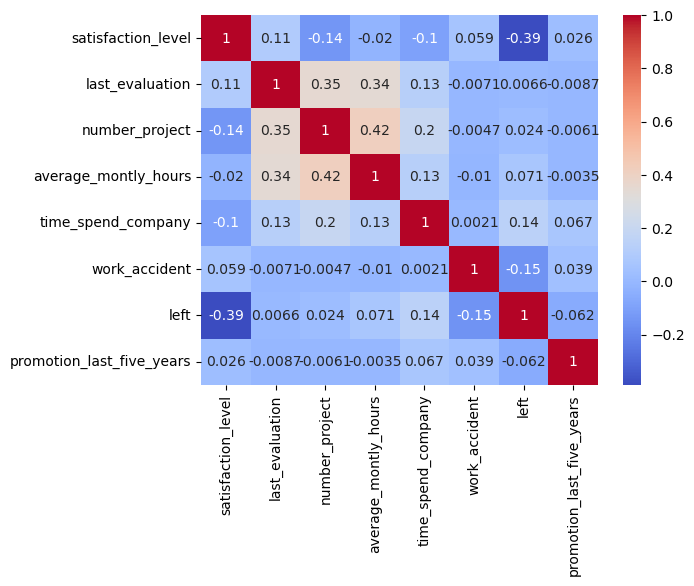

In [5]:
corr_matrix = hr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
corr_matrix

Две наиболее коррелированные переменные "number_project" и "average_monthly_hours" с коэффициентом корреляции 0,42.

Это говорит о том, что сотрудники, которые работают над большим количеством проектов, как правило, имеют более высокую среднемесячную продолжительность рабочего времени.

Две наименее коррелированные переменные "left" и "satisfaction_level" с коэффициентом корреляции -0.39.

Это говорит о том, что по мере снижения уровня удовлетворенности сотрудника вероятность его ухода из компании возрастает.

### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [80]:
table_department = pd.crosstab(hr.department, hr.left)
table_department_sorted = table_department.sort_values(by= 0, ascending=False)
display(table_department_sorted)

left,0,1
department,,
sales,3126,1014
technical,2023,697
support,1674,555
IT,954,273
product_mng,704,198
RandD,666,121
marketing,655,203
accounting,563,204
management,539,91


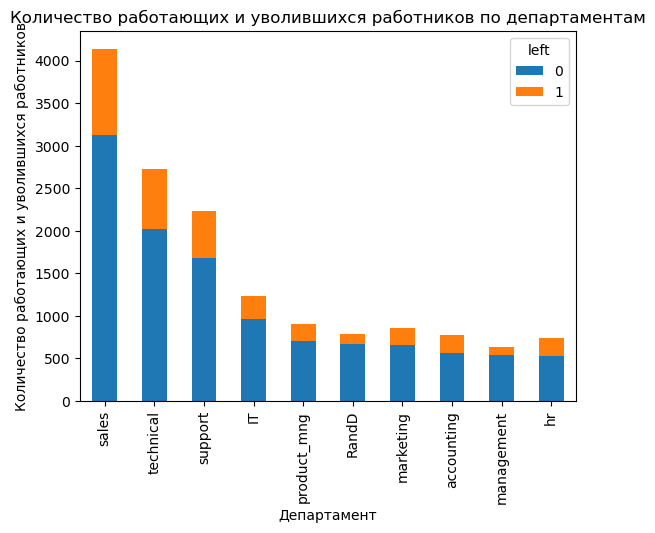

In [65]:
table_department_sorted.plot(kind='bar', stacked=True)
plt.title('Количество работающих и уволившихся работников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество работающих и уволившихся работников')
plt.show()

### Задание 5
Показать распределение сотрудников по зарплатам.

In [77]:
salary_counts = hr['salary'].value_counts()
salary_counts

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

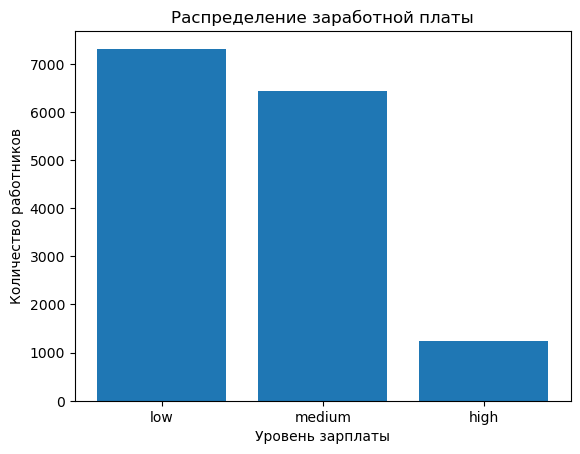

In [78]:
plt.bar(salary_counts.index, salary_counts.values)

plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество работников')
plt.title('Распределение заработной платы')
plt.show()

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [69]:
table_department_salary = pd.crosstab(hr.department, hr.salary)
table_department_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


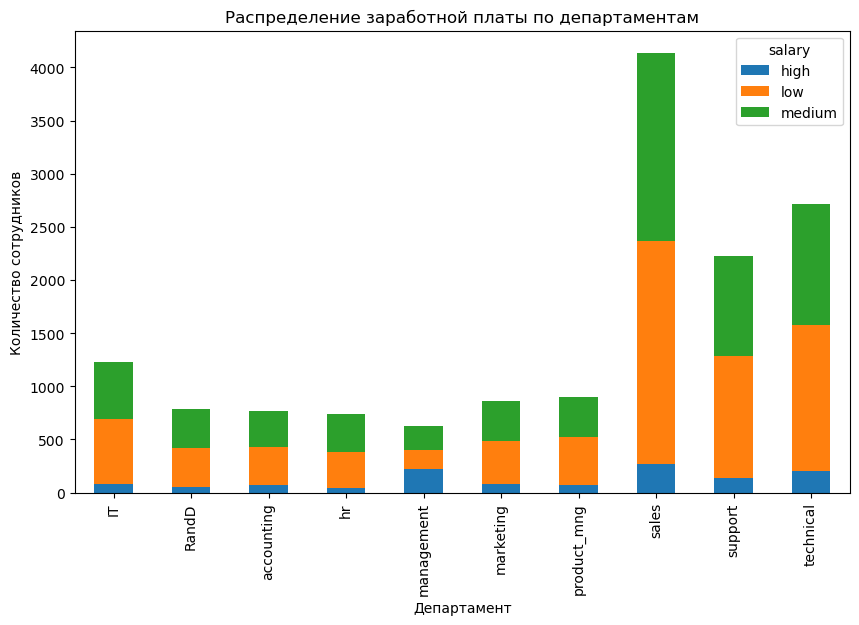

In [76]:
table_department_salary.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Распределение заработной платы по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом

In [79]:
high_salary = hr[hr['salary'] == 'high']['average_montly_hours']
low_salary = hr[hr['salary'] == 'low']['average_montly_hours']

t_stat, p_val = st.ttest_ind(high_salary, low_salary)

print(f"t-statistic: {t_stat:.2f}"
print(f"p-value: {p_val:.2f}")

t-statistic: -0.73
p-value: 0.47


Поскольку p-значение больше 0,05, мы не можем отвергнуть нулевую гипотезу, которая предполагает, что нет существенной разницы в среднемесячных часах, проведенных на работе между сотрудниками с высокой и низкой заработной платой.

### Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

#### Доля сотрудников с повышением за последние 5 лет:

In [10]:
retired = hr[hr['left'] == 1]
employees = hr[hr['left'] == 0]

In [11]:
ratio_retired = ((len(retired[retired['promotion_last_five_years'] == 1]) / len(retired[retired['promotion_last_five_years'] == 0]))* 100)
print(f"Процент уволившихся сотрудников получшивших повышение за последние 5 лет: {ratio_retired:.2f}%\n")
retired_list = [retired['promotion_last_five_years'].value_counts()][0]
print(f'Количество уволившихся сотрудников не получивших повышение: {retired_list[0]}')
print(f'Количество уволившихся сотрудников получивших повышение: {retired_list[1]}')

Процент уволившихся сотрудников получшивших повышение за последние 5 лет: 0.53%

Количество уволившихся сотрудников не получивших повышение: 3552
Количество уволившихся сотрудников получивших повышение: 19


In [12]:
ratio_employees = ((len(employees[employees['promotion_last_five_years'] == 1]) / len(employees[employees['promotion_last_five_years'] == 0]))* 100)
print(f"Процент работающих сотрудников получшивших повышение за последние 5 лет: {ratio_employees:.2f}%\n")
employees_list = [employees['promotion_last_five_years'].value_counts()][0]
print(f'Количество работающих сотрудников не получивших повышение: {employees_list[0]}')
print(f'Количество работающих сотрудников получивших повышение: {employees_list[1]}')

Процент работающих сотрудников получшивших повышение за последние 5 лет: 2.70%

Количество работающих сотрудников не получивших повышение: 11128
Количество работающих сотрудников получивших повышение: 300


In [13]:
table_retired = pd.crosstab(retired.department, retired.promotion_last_five_years)
table_retired_sorted = table_retired.sort_values(by= 1, ascending=False)
print('Количество уволившихся сотрудников получивших повышение по департаментам:')
display(table_retired_sorted)

Количество уволившихся сотрудников получивших повышение по департаментам:


promotion_last_five_years,0,1
department,,
sales,1007,7
IT,270,3
management,88,3
support,552,3
technical,694,3
RandD,121,0
accounting,204,0
hr,215,0
marketing,203,0


In [14]:
table_employees = pd.crosstab(employees.department, employees.promotion_last_five_years)
table_employees_sorted = table_employees.sort_values(by= 1, ascending=False)
print('Количество работающих сотрудников получивших повышение по департаментам:')
display(table_employees_sorted)

Количество работающих сотрудников получивших повышение по департаментам:


promotion_last_five_years,0,1
department,,
sales,3033,93
management,473,66
marketing,612,43
RandD,639,27
technical,1998,25
support,1657,17
hr,509,15
accounting,549,14
IT,954,0


#### Средняя степень удовлетворенности:

In [15]:
left_mean = retired['satisfaction_level'].mean()
stayed_mean = employees['satisfaction_level'].mean()

print(f"Средний уровень удовлетворенности уволившихся сотрудников: {left_mean:.2f}")
print(f"Средний уровень удовлетворенности работающих сотрудников: {stayed_mean:.2f}")

Средний уровень удовлетворенности уволившихся сотрудников: 0.44
Средний уровень удовлетворенности работающих сотрудников: 0.67


#### Среднее количество проектов:

In [16]:
left_mean = retired['number_project'].mean()
stayed_mean = employees['number_project'].mean()

print(f"Среднее количество проектов уволившихся сотрудников: {left_mean:.2f}")
print(f"Среднее количество проектов работающих сотрудников: {stayed_mean:.2f}")

Среднее количество проектов уволившихся сотрудников: 3.86
Среднее количество проектов работающих сотрудников: 3.79


### Задание 9

#### Разделить данные на тестовую и обучающую выборки.

In [48]:
hr_learn = hr[
    [
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'work_accident',
        'left',
        'promotion_last_five_years'
    ]
]
left = pd.array(hr_learn['left'])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(hr_learn[
    ['satisfaction_level',
     'last_evaluation',
     'number_project',
     'average_montly_hours',
     'time_spend_company',
     'work_accident',
     'left',
     'promotion_last_five_years']
], left, test_size=0.20)

#### Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary).

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [52]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

#### Оценить качество модели на тестовой выборки.

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7653333333333333

### Из предоставленных данных можно сделать следующие выводы:

Среднее значение уровня удовлетворенности работой сотрудников составляет 0.61, что может быть не достаточно высоким для успешной работы.

Среднее значение количества проектов на одного сотрудника составляет 3.8, что может означать перегрузку работой и недостаточность ресурсов.

Средняя продолжительность работы в компании - 3.5 года, что может быть достаточно низким показателем для устойчивого развития компании.

Две наиболее коррелированные переменные "number_project" и "average_monthly_hours" имеют коэффициент корреляции 0.42, что может указывать на то, что чем больше проектов, тем больше часов работает сотрудник.

Две наименее коррелированные переменные "left" и "satisfaction_level" имеют коэффициент корреляции -0.39, что может указывать на то, что низкий уровень удовлетворенности работой может быть фактором, способствующим уходу из компании.

Построенная модель LDA показала точность предсказания ухода сотрудников на уровне 76.5%.


Таким образом, необходимо уделить внимание уровню удовлетворенности работой сотрудников, оптимизации нагрузки по проектам и увеличению средней продолжительности работы в компании для повышения эффективности работы и снижения текучести кадров.